In [1]:
from pycocotools import mask as m
import numpy as np
import sys

In [2]:
pred = {'predictions': [{'class': 'vehicle', 'mask': 'bd8', 'size': [500, 500]},
                 {'class': 'vehicle', 'mask': '`Td7', 'size': [500, 500]}],
 'status': 'Success',
 'timestamp': '12788901'}

In [3]:
sz = [500, 500]
c = pred['predictions'][0]['mask']

In [4]:
mask = 'd4Y1o4001O001O001O001O1N2O1N2N2O1N101N10000O100O100O100O100000000000000001O001O1O001O1O1O001O001O001dN^KP1b4nNbKP1_4mNeKQ1[4nNgKQ1Z4mNhKR1h4O2N3M4CbJH^58cJG]58eJG\\58dJH\\58eJG[59fJFZ59gJGZ58gJGY59gJGY59hJFX59iJGX58iJGW59iJGW59iJGW59=O0000000O2O0000000000000O11O000[JJW57iJIa40hK7FJa41hK5GJ_43jK3GJ]46kK0GK\\48kKOHI]49iKOII]4:iKNHI_4:gKNII`4;eKMJHa4?`KJNHa4T1]KmNc4\\1000000O1000000O10000O100000000O1000000000000O10000000000O10000000O0100O1000O0100O10O0100O100O10O0100O10000000O01000000000ZNhK\\1X4cNiK]1W4bNkK]1U4cNlK\\1T4dNlK\\1T4cNnK\\1R4dNoK[1Q4dNQL[1o3eNQL[1o3eNRL[1m3dNUL[1k3eNVLZ1j3fNVLZ1j3eNWL[1j3dNWL[1i3eNWL[1i3dNXL\\1[4O01O01O00001O001O100O2DSKYOT5>oJAZ54iJKZ52gJMl4b0RK^Oi4i0TKYOh4l0UKUOj4U1O1O00001XK'
sz = [200,200]

In [5]:
c

'bd8'

In [6]:
t = {'size': [118, 75], 'counts': c}

In [7]:
dm = m.decode(t)

In [8]:
dm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
np.unique(dm)

array([0], dtype=uint8)

In [10]:
t = {'size': [200, 200], 'counts': mask}

In [11]:
dm = m.decode(t)

In [12]:
dm.shape

(200, 200)

In [13]:
dm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
fullFrame = np.zeros((900, 1200), dtype='uint8')

In [15]:
ones = np.ones((200,200))

In [16]:
fullFrame[0:200, 0:200] = ones

In [17]:
fullFrame

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
fullFrame.shape

(900, 1200)

In [19]:
# Create the overlay Mask in a new image
# Overlay it ontop of the original image

In [20]:
def vis_mask(img, mask, col, alpha=0.4, show_border=True, border_thick=2):
    """Visualizes a single binary mask."""

    img = img.astype(np.float32)
    idx = np.nonzero(mask)

    img[idx[0], idx[1], :] *= 1.0 - alpha
    img[idx[0], idx[1], :] += alpha * np.array(col)

    if show_border:
        contours = cv.findContours(
            mask.copy(), cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)[-2]
        cv.drawContours(img, contours, -1, col, border_thick, cv.LINE_AA)

    return img.astype(np.uint8)

In [21]:
from PIL import Image
import cv2 as cv
image = np.array(Image.open('/home/sharif/Downloads/rider.JPG'))
image.shape

(900, 1200, 3)

In [22]:
vis = vis_mask(image, fullFrame, [255,255,255])

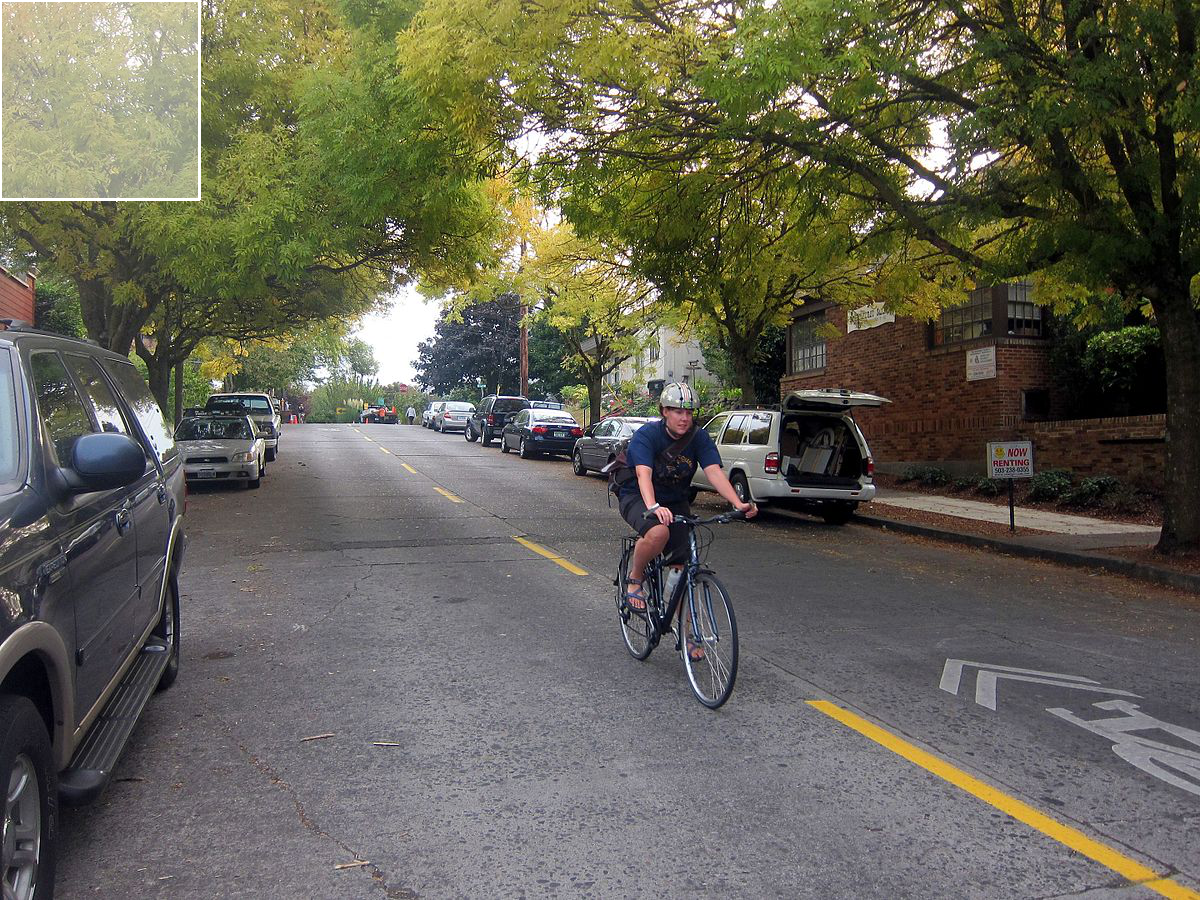

In [23]:
Image.fromarray(vis)

In [28]:
od = '/home/sharif/Documents/sp2-ai-e2e/object_detection.npy'
seg = '/home/sharif/Documents/sp2-ai-e2e/seg.npy'

In [29]:
od = np.load(od, allow_pickle='TRUE').item()
seg = np.load(seg, allow_pickle='TRUE').item()

In [34]:
for vehicle in od['trackersVehicles']:
    print(vehicle)

{'distance_moved': 0.0, 'id': '1e60d50c21f94acfb1d488253b1e1636', 'position': {'py1': 89, 'px1': 465, 'py2': 182, 'px2': 593}, 'numFramesSinceSeen': 0, 'mask': {'counts': [], 'size': []}, 'frameIdxLastSeen': 0, 'numFramesSeen': 0, 'class': 7}
{'distance_moved': 0.0, 'id': '3a15165f0a924ad989365c0ba979394e', 'position': {'py1': 183, 'px1': 575, 'py2': 258, 'px2': 693}, 'numFramesSinceSeen': 0, 'mask': {'counts': [], 'size': []}, 'frameIdxLastSeen': 0, 'numFramesSeen': 0, 'class': 2}
{'distance_moved': 0.0, 'id': 'c76bcd48c47943a099189a6a9c6ecc7c', 'position': {'py1': 29, 'px1': 100, 'py2': 54, 'px2': 143}, 'numFramesSinceSeen': 0, 'mask': {'counts': [], 'size': []}, 'frameIdxLastSeen': 0, 'numFramesSeen': 0, 'class': 2}
{'distance_moved': 0.0, 'id': '6e6681107f154df18196ffe45ba36f74', 'position': {'py1': 375, 'px1': 177, 'py2': 410, 'px2': 212}, 'numFramesSinceSeen': 0, 'mask': {'counts': [], 'size': []}, 'frameIdxLastSeen': 0, 'numFramesSeen': 0, 'class': 1}
{'distance_moved': 0.0, 'id

In [35]:
seg

{'status': 'Success',
 'timestamp': '12788901',
 'predictions': [{'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK1O0O2O1O001N101O000O2O001O00M4M5JTm5',
   'size': [500, 500]},
  {'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK1O0O2O1O001N101O000O2O001O00M4M5JTm5',
   'size': [500, 500]},
  {'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK1O0O2O1O001N101O000O2O001O00M4M5JTm5',
   'size': [500, 500]},
  {'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK1O0O2O1O001N101O000O2O001O00M4M5JTm5',
   'size': [500, 500]},
  {'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK1O0O2O1O001N101O000O2O001O00M4M5JTm5',
   'size': [500, 500]},
  {'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK1O0O2O1O001N101O000O2O001O00M4M5JTm5',
   'size': [500, 500]},
  {'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK1O0O2O1O001N101O000O2O001O00M4M5JTm5',
   'size': [500, 500]},
  {'class': 'person',
   'mask': 'kTm62b?0O100000O101O[\\42ccK